<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

In [5]:
csv = 'C:/Users/nadun/Documents/InstitueOfData/DATA/breast-cancer-wisconsin-data-old.csv'


In [6]:
columns = [
    'Sample_Number',
    'Clump_Thickness',
    'Uniformity_of_Cell_Size',
    'Uniformity_of_Cell_Shape',
    'Marginal_Adhesion',
    'Single_Epithelial_Cell_Size',
    'Bare_Nuclei',
    'Bland_Chromatin',
    'Normal_Nucleoli',
    'Mitoses',
    'Class'
]
df = pd.read_csv(
    filepath_or_buffer = csv,
    header = None,
    names = columns,
    usecols = columns[1:], 
    na_values = '?'
)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [7]:
df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [9]:
df.isnull().sum()

Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [11]:
df.Bare_Nuclei.value_counts(dropna=False)

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
NaN      16
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [12]:
val = df.values
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputedData = imputer.fit_transform(val)

In [14]:
type(imputedData)

numpy.ndarray

In [15]:
scaler = MinMaxScaler(feature_range = (0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [20]:
normalizedData[:2]

array([[0.44444444, 0.        , 0.        , 0.        , 0.11111111,
        0.        , 0.22222222, 0.        , 0.        , 0.        ],
       [0.44444444, 0.33333333, 0.33333333, 0.44444444, 0.66666667,
        1.        , 0.22222222, 0.11111111, 0.        , 0.        ]])

In [23]:
dfnew = pd.DataFrame.from_records(normalizedData, columns = columns[1:])
dfnew.head(2)

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.0,0.222222,0.000000,0.0,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.0,0.222222,0.111111,0.0,0.0


In [26]:
dfnew['Class'].astype(np.int32).head()


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [27]:
dfnew['Class'] = dfnew['Class'].astype(np.int32)

In [28]:
dfnew.columns

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

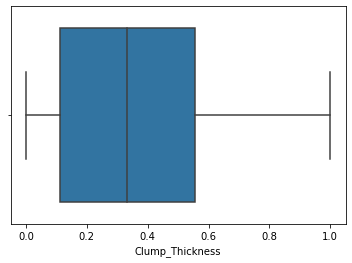

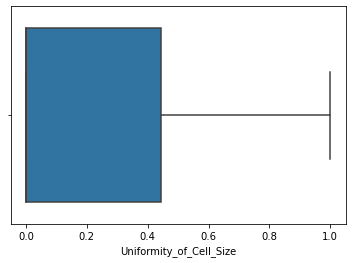

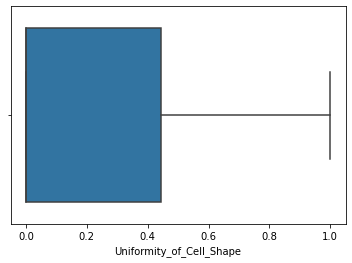

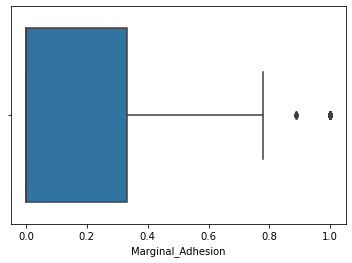

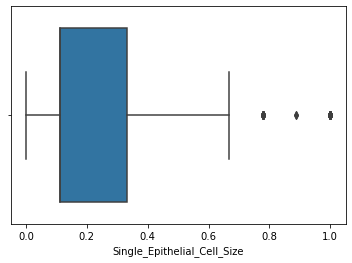

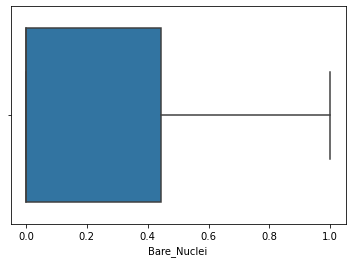

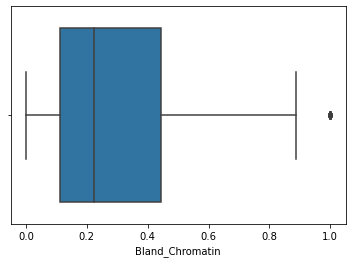

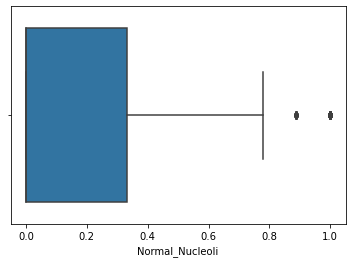

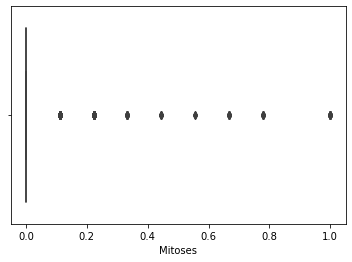

In [29]:
cols = [ c for c in dfnew.columns if c != 'Class']
for c in cols:
    sns.boxplot(x = dfnew[c])   
    plt.show()

In [30]:
dfnew.corr()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity_of_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity_of_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [32]:
features = dfnew.columns[1:-1]
X = dfnew[features]
X.head()

,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [34]:
y = dfnew.Class

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [36]:
kfold = KFold(n_splits = 10)
dt = DecisionTreeClassifier()

In [37]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
cross_val_score(dt, X_train, y_train, cv = kfold).mean()

0.9364370748299319

In [40]:
ac = AdaBoostClassifier(base_estimator = dt, n_estimators = 10, random_state =42)
ac.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10,
                   random_state=42)

In [41]:
cross_val_score(ac, X_train, y_train, cv = kfold).mean()

0.9384778911564625

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

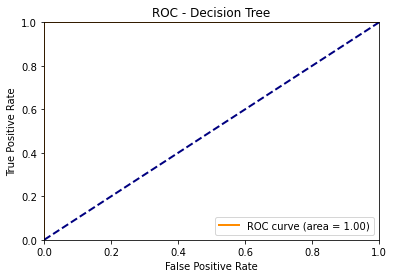

In [42]:
preds1 = dt.predict_proba(X_train)[:,1]
fpr1, tpr1, _ = roc_curve(y_train, preds1)
roc_auc1 = auc(fpr1, tpr1)

plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree')
plt.legend(loc="lower right")
plt.show()

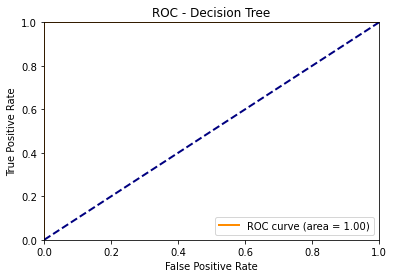

In [43]:
preds1 = ac.predict_proba(X_train)[:,1]
fpr1, tpr1, _ = roc_curve(y_train, preds1)
roc_auc1 = auc(fpr1, tpr1)

plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

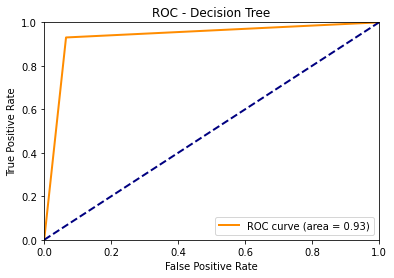

In [44]:
preds1 = dt.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = roc_curve(y_test, preds1)
roc_auc1 = auc(fpr1, tpr1)

plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree')
plt.legend(loc="lower right")
plt.show()

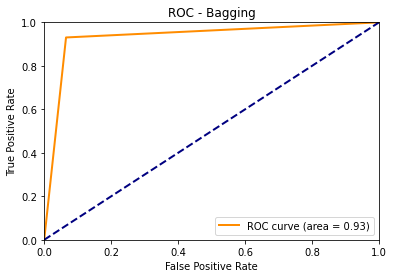

In [45]:
preds1 = ac.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = roc_curve(y_test, preds1)
roc_auc1 = auc(fpr1, tpr1)

plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Bagging')
plt.legend(loc="lower right")
plt.show()

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [50]:
predictions = ac.predict(X_test)
predictions[:5]

array([0, 0, 0, 1, 0])

In [51]:
len(predictions)

210

In [67]:
X_test.index

Int64Index([  4, 407,  89, 427, 178,  17, 274, 228, 429, 617,
            ...
            300, 667, 684, 159, 586,  98, 101, 353, 485, 500],
           dtype='int64', length=210)

In [80]:
X_test.head(10)

,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
4,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0
407,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.0
89,0.000000,0.000000,0.111111,0.222222,0.000000,0.111111,0.000000,0.0
427,0.666667,0.777778,0.111111,0.333333,0.111111,0.444444,1.000000,0.0
178,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
17,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
274,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.111111,0.0
228,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.0
429,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.0
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [82]:
dffinal = pd.DataFrame(predictions, index=X_test.index, columns=['preds'])
dffinal.head(10)

,preds
4,0
407,0
89,0
427,1
178,0
17,0
274,0
228,0
429,0
617,0


In [83]:
dffinal.describe()

,preds
count,210.000000
mean,0.361905
std,0.481700
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [93]:
df_ = dffinal.merge(df, left_index=True, right_index=True)
df_.head()

,preds,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
4,0,4,1,1,3,2,1.0,3,1,1,2
407,0,1,1,1,1,2,1.0,2,1,1,2
89,0,2,1,1,2,3,1.0,2,1,1,2
427,1,8,7,8,2,4,2.0,5,10,1,4
178,0,4,1,1,1,2,1.0,3,1,1,2


In [92]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 4 to 500
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   preds                        210 non-null    int32  
 1   Clump_Thickness              210 non-null    int64  
 2   Uniformity_of_Cell_Size      210 non-null    int64  
 3   Uniformity_of_Cell_Shape     210 non-null    int64  
 4   Marginal_Adhesion            210 non-null    int64  
 5   Single_Epithelial_Cell_Size  210 non-null    int64  
 6   Bare_Nuclei                  207 non-null    float64
 7   Bland_Chromatin              210 non-null    int64  
 8   Normal_Nucleoli              210 non-null    int64  
 9   Mitoses                      210 non-null    int64  
 10  Class                        210 non-null    int64  
dtypes: float64(1), int32(1), int64(9)
memory usage: 18.9 KB


In [94]:
df_['Predicted'] = df_.preds.apply(lambda x: 'Bening' if x == 0 else 'Malignant')

In [96]:
df_['Actual'] = df_.Class.apply(lambda x: 'Bening' if x == 2 else 'Malignant')

In [99]:
df_.sample(20)

,preds,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,Predicted,Actual
610,1,10,4,3,10,3,10.0,7,1,2,4,Malignant,Malignant
625,0,3,1,3,1,3,4.0,1,1,1,2,Bening,Bening
243,0,1,1,1,1,2,5.0,5,1,1,2,Bening,Bening
40,1,6,6,6,9,6,NaN,7,8,1,2,Malignant,Bening
429,0,2,1,1,1,2,1.0,2,1,1,2,Bening,Bening
368,0,1,1,3,1,2,1.0,1,1,1,2,Bening,Bening
5,1,8,10,10,8,7,10.0,9,7,1,4,Malignant,Malignant
578,0,1,1,1,1,2,1.0,2,1,1,2,Bening,Bening
505,0,3,3,1,1,2,1.0,1,1,1,2,Bening,Bening
116,1,8,3,3,1,2,2.0,3,2,1,2,Malignant,Bening




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



